In [3]:
## chargement de BigQuery
%load_ext google.cloud.bigquery

## Requête
from pandas.io import gbq
import pandas as pd
import numpy as np
import matplotlib as plt

In [4]:
data = """
select *
from `bouygues-telecom.93892367.testMC_etudeClient` 
"""

## sauvegarde de la requête en dataFrame 
dataBQ = gbq.read_gbq(data, 'bouygues-telecom', dialect="standard")

In [5]:
## Date en format date
dataBQ["dateVisite"] = pd.to_datetime(dataBQ["dateVisite"])
## Affichage du dataFrame 
dataBQ.head()

,dateVisite,idVisite,idVisiteur,idFoyer,forfait,idOffre,app
0,2018-10-31,1540945663,3821661626643838717,Null,Forfait Data,6270,web
1,2018-10-19,1539949787,2109137966731167799,1047913411,Forfait Data,6010,
2,2018-09-04,1536075025,2109137966731167799,1047913411,Forfait Data,6010,web
3,2018-11-18,1542535466,2109137966731167799,1047913411,Forfait Data,6010,web
4,2018-11-20,1542727074,2109137966731167799,1047913411,Forfait Data,6010,web


In [6]:
# nombre de foyer

print("nombre de foyer distincts : " + str(dataBQ["idFoyer"].nunique()) )

nombre de foyer distincts : 6


In [7]:
client = dataBQ["idFoyer"]

In [8]:
client = dataBQ.groupby(["idFoyer", "forfait"]).nunique()
client.head()

,,dateVisite,idVisite,idVisiteur,idFoyer,forfait,idOffre,app
idFoyer,forfait,,,,,,,
1047913411,Forfait Data,14,15,3,1,1,1,3
26983211821,Forfait Non Bloqué B&YOU,6,18,6,1,1,1,4
37189026301,Forfait Non Bloqué,18,34,4,1,1,1,3
37221632921,Forfait Non Bloqué B&YOU,2,3,1,1,1,1,1
37229805891,FAI ADSL,10,15,4,1,1,1,2


In [38]:
# création de la clé visite
dataBQ["visite"] = dataBQ["idVisite"].astype(str) + dataBQ["idVisiteur"].astype(str) + dataBQ["dateVisite"].astype(str)

# Nombre de visites par foyer
dataVisite = dataBQ[["idFoyer", "app", "visite"]]
dataBQ["app"] = dataBQ["app"].replace({"Appli_android":"android", "Appli_iOS":"iOS"})
dataVisite = dataVisite.groupby("app").nunique()
dataVisite.head()

,idFoyer,app,visite
app,,,
,2,1,2
android,3,1,44
iOS,2,1,18
web,4,1,26


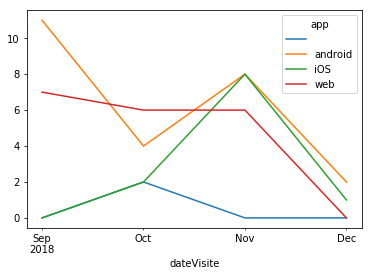

In [52]:
# affichage du nombre de visite par mois
dataFrequence = dataBQ[["dateVisite", "visite", "idFoyer", "app"]]
dataFrequence.set_index("dateVisite", inplace=True)
dataFrequence = dataFrequence.groupby(["dateVisite", "app"]).nunique()
dataFrequence["mean"] = dataFrequence["visite"] / dataFrequence["idFoyer"]
dataFrequence = dataFrequence.unstack().resample("M").count()
dataFrequence["mean"].plot()